# Initialization

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('insurance.txt')
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


## Function to normalize dataset
### normalize_dataset function normalizes the dataset by using the formula
## $X_{normalized} = \frac {X - min(X_i)} {max(X_i) - min(X_i)}$

In [3]:
def normalize_dataset():

    # normalize_coeff stores max and min of every column in dataset for denormalization
    normalize_coeff = {col: {'max': df[col].max(), 'min': df[col].min()} for col in df.columns}

    # normal_df is the normalized dataframe
    normal_df = (df - df.min()) / (df.max() - df.min())

    return pd.DataFrame(normal_df), normalize_coeff

In [4]:
normal_df, normalize_coeff = normalize_dataset()

# Inserting bias column in dataframe
normal_df.insert(0, 'bias', [1] * len(normal_df))

print(normal_df.head())
# print()
# print(normalize_coeff)

   bias       age       bmi  children   charges
0     1  0.021739  0.321227       0.0  0.251611
1     1  0.000000  0.479150       0.2  0.009636
2     1  0.217391  0.458434       0.6  0.053115
3     1  0.326087  0.181464       0.0  0.333010
4     1  0.304348  0.347592       0.0  0.043816


## Function to shuffle the dataset and return $X_{train}, Y_{train}, X_{test}, Y_{test}$ matrices 

In [5]:
def shuffle(dataframe, ratio, target):
    columns = list(dataframe.columns)
    columns.remove(target)
    train_len = int(len(dataframe) * ratio + 1)
    sf = dataframe.sample(frac = 1)
    X = sf[columns]
    Y = sf[target]
    X_train = np.reshape(X.iloc[:train_len].to_numpy(), (-1, len(columns)))
    X_test = np.reshape(X.iloc[train_len:].to_numpy(), (-1, len(columns)))
    Y_train = np.reshape(Y.iloc[:train_len].to_numpy(), (-1, 1))
    Y_test = np.reshape(Y.iloc[train_len:].to_numpy(), (-1, 1))
    return X_train, Y_train, X_test, Y_test

## Function to predict the results

In [6]:
def predict(W, X):
    predictions = X @ W         # '@' performs matrix multiplication
    return predictions

## Function to denormalize a column

In [7]:
def denormalize(arr, name):
    c = np.array(arr).flatten()
    c = np.apply_along_axis(lambda x: x * (normalize_coeff[name]['max'] - normalize_coeff[name]['min']) + normalize_coeff[name]['min'], 0, c)
    return c

## Functions to calculate Error and Accuracy

In [8]:
def calculate_error(y, y_hat, denormalizing_column_name = None):
    y = y.flatten()
    y_hat = y_hat.flatten()
    if denormalizing_column_name is not None:
        y = denormalize(y, denormalizing_column_name)
        y_hat = denormalize(y_hat, denormalizing_column_name)
    sq_err = np.sum((y - y_hat) ** 2)
    mse = sq_err / len(y)
    return mse

In [9]:
def calculate_accuracy(x, y, y_hat):
    y = y.flatten()
    y_hat = y_hat.flatten()
    mse = calculate_error(y, y_hat)
    var_x = np.var(x)
    rMSE = mse / var_x
    R2 = 1 - rMSE   
    return R2

# Building Normal Equation Model
## Function to generate weight matrix W using normal equation
### Formula used:
$ W = (X^TX)^{-1}X^TY $

In [10]:
def get_weight_by_equations(X, Y):
    W = np.linalg.inv(X.T @ X) @ X.T @ Y    # '@' performs matrix multiplication
    return W

## Generating the model 20 times

In [11]:
accuracy = []

for i in range(1, 21):
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    W = get_weight_by_equations(X_train, Y_train)
    predictions = predict(W, X_test)
    accuracy.append(calculate_accuracy(X_test, Y_test, predictions))

mean_accuracy = np.mean(accuracy)
var_accuracy = np.var(accuracy)
max_accuracy = np.max(accuracy)
min_accuracy = np.min(accuracy)
print(f'Mean accuracy = {mean_accuracy}')
print(f'Variance accuracy = {var_accuracy}')
print(f'Max accuracy = {max_accuracy}')
print(f'Min accuracy = {min_accuracy}')

Mean accuracy = 0.7477624755453501
Variance accuracy = 0.0006226574088699212
Max accuracy = 0.7815080515764079
Min accuracy = 0.689564455863334


## Visualizing the results

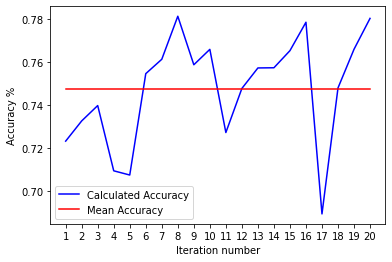

In [12]:
num_points_range = range(1, len(accuracy) + 1)
plt.figure()
plt.plot(num_points_range, accuracy, 'b-')
plt.plot(num_points_range, [mean_accuracy] * len(accuracy), 'r-')
plt.xlabel('Iteration number')
plt.ylabel('Accuracy %')
plt.legend(['Calculated Accuracy', 'Mean Accuracy'])
plt.xticks(num_points_range);